In [1]:
import glob
import cv2
import numpy as np
import matplotlib.pyplot as plt 
import seaborn as sns
import scipy.io as io
sns.set_theme(style="whitegrid")
plt.rcParams['axes.grid'] = False

In [2]:
# Read in the image
size=25
dataset = io.loadmat('train.mat')

x_train = np.squeeze(dataset['data'])
y_train = np.squeeze(dataset['labels'])
x_test= np.squeeze(dataset['data'])
y_test = np.squeeze(dataset['labels'])
x_train = [cv2.resize(img, dsize=(size, size)) for img in x_train]
x_test = [cv2.resize(img, dsize=(size, size)) for img in x_test]    
x_train = [x.reshape(size * size) for x in x_train]    
x_test = [x.reshape(size * size) for x in x_test]

In [3]:
x_train = np.array(x_train)
x_test = np.array(x_test)
x_train = x_train.astype('float32')
x_test = x_test.astype('float32')
x_train = x_train.reshape(-1, 25, 25, 1)
x_test = x_test.reshape(-1, 25, 25, 1)

In [4]:
PlotIndex = 1
# generate a prototype of each class based on average pixels value and plot prototype that obtained 
def Prototype(image_collection,label):
    global PlotIndex
    # empty image for prototype
    Prototaype_ = np.full(image_collection[0].shape,0, dtype = np.uint8) 
    
    for row in range(image_collection[0].shape[0]):
        for col in range(image_collection[0].shape[1]):
                value = 0
                for image in image_collection :
                    value += image[row][col]
                value /= len(image_collection)
                if value > 0.5: 
                    Prototaype_[row][col] = 1
                else:
                    Prototaype_[row][col] = 0
    PlotIndex += 1
    return Prototaype_
prototype_0 = Prototype(x_train[y_train == 0],0)
prototype_1 = Prototype(x_train[y_train == 1],1)
prototype_2 = Prototype(x_train[y_train == 2],2)
prototype_3 = Prototype(x_train[y_train == 3],3)
prototype_4 = Prototype(x_train[y_train == 4],4)
prototype_5 = Prototype(x_train[y_train == 5],5)
prototype_6 = Prototype(x_train[y_train == 6],6)
prototype_7 = Prototype(x_train[y_train == 7],7)
prototype_8 = Prototype(x_train[y_train == 8],8)
prototype_9 = Prototype(x_train[y_train == 9],9)
Prototypes = [prototype_0,prototype_1,prototype_2,prototype_3,prototype_4,prototype_5,prototype_6,prototype_7,prototype_8,prototype_9]

In [5]:
#minimum distance classifier based on pixel brightness distnace from prototypes 
def MinDisClass(element,Prototypes):
    min_index=-1
    min=-1
    for i in range(len(Prototypes)):
        if i == 0:
            min = np.sum(np.abs(element - Prototypes[i]))
            min_index = i
        else:
            if np.sum(np.abs(element - Prototypes[i])) < min:
                min = np.sum(np.abs(element - Prototypes[i]))
                min_index = i
    return min_index

In [6]:
y_pred=np.empty(y_test.shape)
index=0
for i in x_test:
    y_pred[index]=MinDisClass(i,Prototypes)
    index+=1

In [7]:
import sklearn.metrics as metrics
print(metrics.classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.77      0.98      0.86      6000
           1       0.79      0.98      0.87      6000
           2       0.66      0.62      0.64      6000
           3       0.75      0.71      0.73      6000
           4       0.78      0.67      0.72      6000
           5       0.96      0.83      0.89      6000
           6       0.87      0.61      0.71      6000
           7       0.91      0.88      0.90      6000
           8       0.87      0.87      0.87      6000
           9       0.76      0.93      0.84      6000

    accuracy                           0.81     60000
   macro avg       0.81      0.81      0.80     60000
weighted avg       0.81      0.81      0.80     60000



<AxesSubplot:>

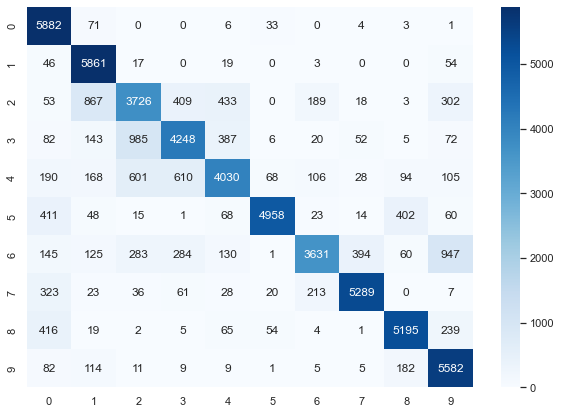

In [8]:
cm=metrics.confusion_matrix(y_test, y_pred)
plt.figure(figsize = (10,7))
sns.heatmap(cm, annot=True, 
            fmt='.5g', cmap='Blues')

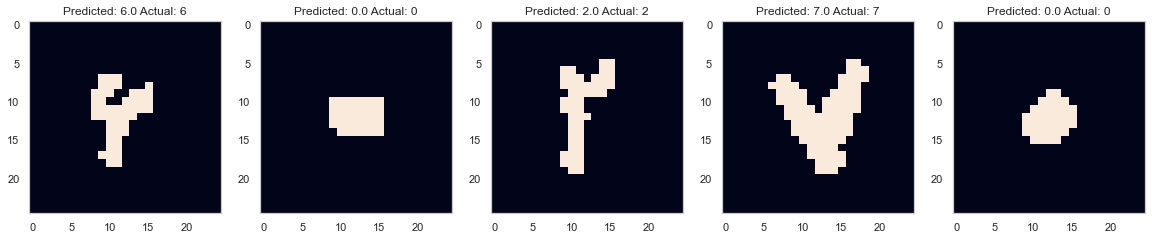

In [23]:
index=0
k=0
plt.figure(figsize = (20,20))
for i in x_test:
    plt.subplot(1,5,k+1)
    if y_pred[index] == y_test[index]:
        plt.imshow(i)
        plt.title('Predicted: '+str(y_pred[index])+' Actual: '+str(y_test[index]))
        k+=1
    index+=1
    if k == 5:
        break
plt.show()